# Machine Learning Model for Portland Housing Data

This file has three parts:
1. Supvervised ML Model - Zillow Dataset
2. Supevised ML Model - AirBNB Dataset
3. Predictive Tool

# 1. Supervised ML Model - zillow Dataset

In [1]:
# import dependencies
# sklearn is the Scikit-learn machine learning library for Python
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sb

import sqlite3
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

## Explore the data

In [2]:
con = sqlite3.connect("finalprojectdatabase.db")
zlw = pd.read_sql_query("SELECT * from zillow", con)
zlw

,Address,City,Zipcode,bathrooms,bedrooms,daysOnZillow,homeType,latitude,livingArea,longitude,lotSize,date_sold,price,pricePerSquareFoot,rentZestimate,taxAssessedValue,taxAssessedYear,url,yearBuilt
0,2860 NE Blossom Hill Rd,Fairview,97024,3.0,3.0,25.0,TOWNHOUSE,45.543571,1806.0,-122.441765,1555.0,2021-05-21,315400,175.0,1950.0,273960.0,2020-01-01,https://www.zillow.com/homedetails/2860-NE-Blo...,2007-01-01
1,1121 SW 10th Dr,Gresham,97080,3.0,4.0,11.0,SINGLE_FAMILY,45.488228,2724.0,-122.444420,9583.0,2021-06-04,512000,188.0,1995.0,397560.0,2020-01-01,https://www.zillow.com/homedetails/1121-SW-10t...,1982-01-01
2,19309 NE Glisan St,Portland,97230,1.0,3.0,11.0,SINGLE_FAMILY,45.526634,1217.0,-122.464088,13939.0,2021-06-04,348000,286.0,1695.0,269520.0,2017-01-01,https://www.zillow.com/homedetails/19309-NE-Gl...,1953-01-01
3,1518 SE 12th St,Gresham,97080,2.0,3.0,14.0,SINGLE_FAMILY,45.487991,1150.0,-122.416184,7000.0,2021-06-01,404200,351.0,1800.0,309260.0,2020-01-01,https://www.zillow.com/homedetails/1518-SE-12t...,1967-01-01
4,110 NW Willowbrook Ct,Gresham,97030,2.0,3.0,25.0,SINGLE_FAMILY,45.498184,2036.0,-122.451332,6969.0,2021-05-21,478200,235.0,2250.0,373030.0,2020-01-01,https://www.zillow.com/homedetails/110-NW-Will...,1978-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,7210 SW 156th Ave,Beaverton,97007,2.0,3.0,360.0,SINGLE_FAMILY,45.467113,1752.0,-122.837746,9147.0,2020-07-24,410000,234.0,2462.0,402690.0,2019-01-01,https://www.zillow.com/homedetails/7210-SW-156...,1991-01-01
18261,7050 SW 152nd Ave,Beaverton,97007,2.0,3.0,360.0,SINGLE_FAMILY,45.468781,1924.0,-122.833855,14374.0,2020-07-24,485000,252.0,2562.0,410120.0,2019-01-01,https://www.zillow.com/homedetails/7050-SW-152...,1981-01-01
18262,7600 SW Erica Pl,Beaverton,97008,2.0,3.0,363.0,SINGLE_FAMILY,45.465111,1378.0,-122.808701,10018.0,2020-07-21,415000,301.0,2495.0,386050.0,2019-01-01,https://www.zillow.com/homedetails/7600-SW-Eri...,1977-01-01
18263,7275 SW Palmer Way,Beaverton,97007,3.0,4.0,364.0,SINGLE_FAMILY,45.467197,2176.0,-122.829628,9583.0,2020-07-20,615000,283.0,2495.0,447330.0,2019-01-01,https://www.zillow.com/homedetails/7275-SW-Pal...,1974-01-01


In [3]:
zlw.shape

(18265, 19)

In [4]:
cols = zlw.columns.to_list()
print(cols)

['Address', 'City', 'Zipcode', 'bathrooms', 'bedrooms', 'daysOnZillow', 'homeType', 'latitude', 'livingArea', 'longitude', 'lotSize', 'date_sold', 'price', 'pricePerSquareFoot', 'rentZestimate', 'taxAssessedValue', 'taxAssessedYear', 'url', 'yearBuilt']


In [5]:
# drop columns not needed for machine learning
zlw = zlw.drop(['Address', 'date_sold', 'url', 'rentZestimate', 'latitude', 'longitude'], axis=1)
zlw.head()

,City,Zipcode,bathrooms,bedrooms,daysOnZillow,homeType,livingArea,lotSize,price,pricePerSquareFoot,taxAssessedValue,taxAssessedYear,yearBuilt
0,Fairview,97024,3.0,3.0,25.0,TOWNHOUSE,1806.0,1555.0,315400,175.0,273960.0,2020-01-01,2007-01-01
1,Gresham,97080,3.0,4.0,11.0,SINGLE_FAMILY,2724.0,9583.0,512000,188.0,397560.0,2020-01-01,1982-01-01
2,Portland,97230,1.0,3.0,11.0,SINGLE_FAMILY,1217.0,13939.0,348000,286.0,269520.0,2017-01-01,1953-01-01
3,Gresham,97080,2.0,3.0,14.0,SINGLE_FAMILY,1150.0,7000.0,404200,351.0,309260.0,2020-01-01,1967-01-01
4,Gresham,97030,2.0,3.0,25.0,SINGLE_FAMILY,2036.0,6969.0,478200,235.0,373030.0,2020-01-01,1978-01-01


In [6]:
zlw.shape

(18265, 13)

<AxesSubplot:>

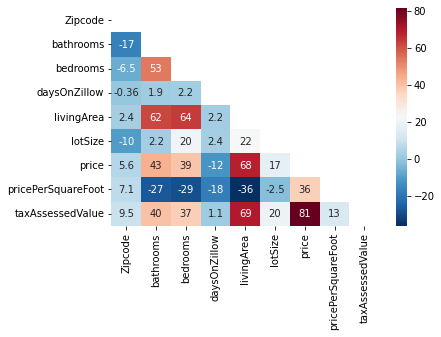

In [7]:
# correlation heatmap
mask = np.zeros_like(zlw.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# heatmap
sb.heatmap(zlw.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

The median house price is $517,000.00.


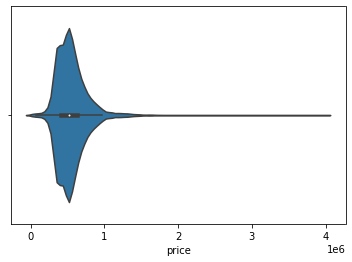

In [8]:
# view distribution of the target variable (price)
sb.violinplot(data=zlw, x='price')
print(f"The median house price is ${(zlw.price.median()):,.2f}.")

In [9]:
zlw.describe()

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,price,pricePerSquareFoot,taxAssessedValue
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,1.826500e+04,18265.000000,1.826500e+04
mean,97148.242431,2.460827,3.368191,187.579250,2078.627922,6852.924884,5.496832e+05,275.870298,4.636757e+05
std,86.271481,0.814036,0.769367,112.751753,765.683850,3171.615991,2.242703e+05,85.691069,1.899900e+05
min,97003.000000,1.000000,2.000000,1.000000,528.000000,421.000000,3.000000e+02,0.000000,9.500000e+02
25%,97062.000000,2.000000,3.000000,82.000000,1498.000000,4791.000000,4.100000e+05,225.000000,3.449300e+05
50%,97203.000000,3.000000,3.000000,192.000000,1978.000000,6534.000000,5.170000e+05,264.000000,4.260800e+05
75%,97221.000000,3.000000,4.000000,293.000000,2561.000000,8712.000000,6.335000e+05,313.000000,5.393100e+05
max,97267.000000,4.500000,5.000000,364.000000,4540.000000,17800.000000,4.000000e+06,2019.000000,4.008660e+06


In [10]:
zlw.dtypes

City                   object
Zipcode                 int64
bathrooms             float64
bedrooms              float64
daysOnZillow          float64
homeType               object
livingArea            float64
lotSize               float64
price                   int64
pricePerSquareFoot    float64
taxAssessedValue      float64
taxAssessedYear        object
yearBuilt              object
dtype: object

In [11]:
# we know there is no missing/null or duplicate data because it was completed in the ETL file

In [12]:
# assign dummy values to object columns
# by hot encode categorical data
zlw_dum = pd.get_dummies(zlw, columns = ['City', 'homeType', 'taxAssessedYear', 'yearBuilt'])
zlw_dum.head()

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,price,pricePerSquareFoot,taxAssessedValue,City_Aloha,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
0,97024,3.0,3.0,25.0,1806.0,1555.0,315400,175.0,273960.0,0,...,0,0,0,0,0,0,0,0,0,0
1,97080,3.0,4.0,11.0,2724.0,9583.0,512000,188.0,397560.0,0,...,0,0,0,0,0,0,0,0,0,0
2,97230,1.0,3.0,11.0,1217.0,13939.0,348000,286.0,269520.0,0,...,0,0,0,0,0,0,0,0,0,0
3,97080,2.0,3.0,14.0,1150.0,7000.0,404200,351.0,309260.0,0,...,0,0,0,0,0,0,0,0,0,0
4,97030,2.0,3.0,25.0,2036.0,6969.0,478200,235.0,373030.0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
zlw_dum.dtypes

Zipcode                   int64
bathrooms               float64
bedrooms                float64
daysOnZillow            float64
livingArea              float64
                         ...   
yearBuilt_2017-01-01      uint8
yearBuilt_2018-01-01      uint8
yearBuilt_2019-01-01      uint8
yearBuilt_2020-01-01      uint8
yearBuilt_2021-01-01      uint8
Length: 185, dtype: object

## Scale & Normalize the Data

#### Resources
* https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832
* https://medium.com/p/b79592732b79
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

## Machine Learning

#### StandardScaler

In [14]:
# set features list for assigning df after scaler
zlw_scaled_std = zlw_dum.copy()
zlw_scaled_std = zlw_scaled_std.drop('price', axis=1)
col_names_std_zlw = zlw_scaled_std.columns
features_std_zlw = zlw_scaled_std[col_names_std_zlw]

In [15]:
from sklearn.preprocessing import StandardScaler
scaler_std_zlw = StandardScaler()

In [16]:
# set variables
y_std_zlw = zlw_dum.price
X_std_zlw = zlw_scaled_std

In [17]:
# fit and transform the X data; leave y data so we can interpret predicted price
zlw_scaled_std[col_names_std_zlw] = scaler_std_zlw.fit_transform(features_std_zlw.values)
zlw_scaled_std

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,pricePerSquareFoot,taxAssessedValue,City_Aloha,City_Beaverton,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
0,-1.440173,0.662364,-0.478576,-1.441962,-0.356068,-1.670464,-1.177171,-0.998584,-0.133962,-0.325316,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
1,-0.791041,0.662364,0.821230,-1.566132,0.842893,0.860807,-1.025459,-0.348005,-0.133962,-0.325316,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
2,0.947704,-1.794597,-0.478576,-1.566132,-1.125336,2.234277,0.118215,-1.021954,-0.133962,-0.325316,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
3,-0.791041,-0.566117,-0.478576,-1.539524,-1.212842,0.046374,0.876775,-0.812779,-0.133962,-0.325316,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
4,-1.370623,-0.566117,-0.478576,-1.441962,-0.055675,0.036599,-0.476962,-0.477121,-0.133962,-0.325316,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,-1.637230,-0.566117,-0.478576,1.529249,-0.426595,0.723334,-0.488633,-0.321003,-0.133962,3.073936,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
18261,-1.637230,-0.566117,-0.478576,1.529249,-0.201953,2.371435,-0.278570,-0.281895,-0.133962,3.073936,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
18262,-1.625639,-0.566117,-0.478576,1.555857,-0.915061,0.997965,0.293267,-0.408589,-0.133962,3.073936,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878
18263,-1.637230,0.662364,0.821230,1.564726,0.127174,0.860807,0.083205,-0.086037,-0.133962,3.073936,...,-0.096927,-0.096927,-0.091302,-0.108366,-0.112929,-0.104419,-0.091607,-0.080293,-0.137518,-0.06878


In [18]:
# check mean (~0) and standard deviation (~1) of the scaled data
zlw_scaled_std.describe()

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,pricePerSquareFoot,taxAssessedValue,City_Aloha,City_Beaverton,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
count,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,18265.000000,...,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04,1.826500e+04
mean,-6.572861e-15,-2.147383e-16,-2.054019e-16,-1.493832e-16,-2.520841e-16,3.112150e-17,2.520841e-16,9.336450e-17,-2.489720e-17,0.000000,...,4.668225e-18,6.224300e-18,-4.279206e-18,4.668225e-18,2.878739e-17,-7.002337e-17,-9.336450e-18,-3.423365e-17,-6.224300e-18,2.061799e-17
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027,...,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-1.683597e+00,-1.794597e+00,-1.778382e+00,-1.654824e+00,-2.025210e+00,-2.028020e+00,-3.219447e+00,-2.435593e+00,-1.339616e-01,-0.325316,...,-9.692709e-02,-9.692709e-02,-9.130221e-02,-1.083660e-01,-1.129291e-01,-1.044186e-01,-9.160657e-02,-8.029316e-02,-1.375176e-01,-6.878033e-02
25%,-9.996906e-01,-5.661167e-01,-4.785763e-01,-9.364124e-01,-7.583336e-01,-6.501359e-01,-5.936639e-01,-6.250274e-01,-1.339616e-01,-0.325316,...,-9.692709e-02,-9.692709e-02,-9.130221e-02,-1.083660e-01,-1.129291e-01,-1.044186e-01,-9.160657e-02,-8.029316e-02,-1.375176e-01,-6.878033e-02
50%,6.347297e-01,6.623639e-01,-4.785763e-01,3.920889e-02,-1.314259e-01,-1.005587e-01,-1.385281e-01,-1.978880e-01,-1.339616e-01,-0.325316,...,-9.692709e-02,-9.692709e-02,-9.130221e-02,-1.083660e-01,-1.129291e-01,-1.044186e-01,-9.160657e-02,-8.029316e-02,-1.375176e-01,-6.878033e-02
75%,8.433791e-01,6.623639e-01,8.212297e-01,9.350066e-01,6.300058e-01,5.861763e-01,4.333091e-01,3.981071e-01,-1.339616e-01,-0.325316,...,-9.692709e-02,-9.692709e-02,-9.130221e-02,-1.083660e-01,-1.129291e-01,-1.044186e-01,-9.160657e-02,-8.029316e-02,-1.375176e-01,-6.878033e-02
max,1.376594e+00,2.505085e+00,2.121036e+00,1.564726e+00,3.214694e+00,3.451671e+00,2.034258e+01,1.865931e+01,7.464824e+00,3.073936,...,1.031703e+01,1.031703e+01,1.095264e+01,9.227982e+00,8.855114e+00,9.576833e+00,1.091625e+01,1.245436e+01,7.271799e+00,1.453904e+01


In [19]:
zlw_scaled_std.shape

(18265, 184)

In [20]:
from sklearn.model_selection import train_test_split
# split into testing and training sets
X_std_train_zlw, X_std_test_zlw, y_std_train_zlw, y_std_test_zlw = train_test_split(X_std_zlw, y_std_zlw, test_size=0.2, random_state=573)
print(X_std_train_zlw.shape)

(14612, 184)


In [21]:
from sklearn.linear_model import LinearRegression
model_std_zlw = LinearRegression()

In [22]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model_std_zlw.fit(X_std_zlw, y_std_zlw)
training_score_std_zlw = model_std_zlw.score(X_std_train_zlw, y_std_train_zlw)
testing_score_std_zlw = model_std_zlw.score(X_std_test_zlw, y_std_test_zlw)

print(f"Training Score: {training_score_std_zlw}")
print(f"Testing Score: {testing_score_std_zlw}")

Training Score: 0.9234357952880548
Testing Score: 0.9161900173183036


In [23]:
y_pred_std_zlw = model_std_zlw.predict(X_std_test_zlw)

In [24]:
# compare actual vs predicted
regr_df_std_zlw = pd.DataFrame({'Actual':y_std_test_zlw, 'Predicted':y_pred_std_zlw, 'ABS Difference': abs(y_std_test_zlw-y_pred_std_zlw)})

In [25]:
regr_df_std_zlw.describe()

,Actual,Predicted,ABS Difference
count,3.653000e+03,3.653000e+03,3.653000e+03
mean,5.505448e+05,5.517258e+05,3.830818e+04
std,2.322957e+05,2.205441e+05,5.526821e+04
min,3.000000e+02,-1.689609e+05,8.656064e-01
25%,4.084320e+05,4.123191e+05,1.131287e+04
50%,5.160000e+05,5.196631e+05,2.448887e+04
75%,6.340000e+05,6.449911e+05,4.626487e+04
max,4.000000e+06,2.877495e+06,1.122505e+06


#### MinMaxScaler

In [26]:
# set features list for assigning df after scaler
zlw_scaled_mm = zlw_dum.copy()
zlw_scaled_mm = zlw_scaled_mm.drop('price', axis=1)
col_names_mm_zlw = zlw_scaled_mm.columns
features_mm_zlw = zlw_scaled_mm[col_names_mm_zlw]

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler_mm_zlw = MinMaxScaler()

In [28]:
# set variables
y_mm_zlw = zlw_dum.price
X_mm_zlw = zlw_scaled_mm

In [29]:
# fit and transform the data
zlw_scaled_mm[col_names_mm_zlw] = scaler_mm_zlw.fit_transform(features_mm_zlw.values)
zlw_scaled_mm

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,pricePerSquareFoot,taxAssessedValue,City_Aloha,City_Beaverton,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
0,0.079545,0.571429,0.333333,0.066116,0.318544,0.065251,0.086677,0.068121,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.291667,0.571429,0.666667,0.027548,0.547358,0.527188,0.093115,0.098962,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.859848,0.000000,0.333333,0.027548,0.171735,0.777835,0.141654,0.067013,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.291667,0.285714,0.333333,0.035813,0.155035,0.378560,0.173848,0.076929,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.102273,0.285714,0.333333,0.066116,0.375872,0.376777,0.116394,0.092841,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,0.015152,0.285714,0.333333,0.988981,0.305085,0.502100,0.115899,0.100242,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18261,0.015152,0.285714,0.333333,0.988981,0.347956,0.802866,0.124814,0.102096,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18262,0.018939,0.285714,0.333333,0.997245,0.211864,0.552218,0.149084,0.096090,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18263,0.015152,0.571429,0.666667,1.000000,0.410768,0.527188,0.140168,0.111380,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
zlw_scaled_mm.describe()

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,pricePerSquareFoot,taxAssessedValue,City_Aloha,City_Beaverton,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,...,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000
mean,0.550161,0.417379,0.456064,0.513992,0.386497,0.370098,0.136637,0.115459,0.017629,0.095702,...,0.009307,0.009307,0.008267,0.011607,0.012592,0.010786,0.008322,0.006406,0.018560,0.004708
std,0.326786,0.232582,0.256456,0.310611,0.190848,0.182497,0.042442,0.047406,0.131604,0.294190,...,0.096028,0.096028,0.090550,0.107111,0.111510,0.103295,0.090847,0.079781,0.134969,0.068458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223485,0.285714,0.333333,0.223140,0.241775,0.251453,0.111441,0.085830,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.757576,0.571429,0.333333,0.526171,0.361416,0.351746,0.130758,0.106078,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.825758,0.571429,0.666667,0.804408,0.506730,0.477070,0.155027,0.134331,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
zlw_scaled_mm.shape

(18265, 184)

In [32]:
from sklearn.model_selection import train_test_split
# split into testing and training sets
X_mm_train_zlw, X_mm_test_zlw, y_mm_train_zlw, y_mm_test_zlw = train_test_split(X_mm_zlw, y_mm_zlw, test_size=0.2, random_state=573)
print(X_mm_train_zlw.shape)

(14612, 184)


In [33]:
from sklearn.linear_model import LinearRegression
model_mm_zlw = LinearRegression()

In [34]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model_mm_zlw.fit(X_mm_zlw, y_mm_zlw)
training_score_mm_zlw = model_mm_zlw.score(X_mm_train_zlw, y_mm_train_zlw)
testing_score_mm_zlw = model_mm_zlw.score(X_mm_test_zlw, y_mm_test_zlw)

print(f"Training Score: {training_score_mm_zlw}")
print(f"Testing Score: {testing_score_mm_zlw}")

Training Score: 0.9234734554175196
Testing Score: 0.916131595720699


In [35]:
y_pred_mm_zlw = model_mm_zlw.predict(X_mm_test_zlw)

In [36]:
# compare actual vs predicted
regr_df_mm_zlw = pd.DataFrame({'Actual':y_mm_test_zlw, 'Predicted':y_pred_mm_zlw, 'ABS Difference': abs(y_mm_test_zlw-y_pred_mm_zlw)})
regr_df_mm_zlw

,Actual,Predicted,ABS Difference
12545,390000,366016.0,23984.0
516,640000,626688.0,13312.0
13431,570000,531648.0,38352.0
13730,325000,337088.0,12088.0
10990,730000,831680.0,101680.0
...,...,...,...
2600,330000,296672.0,33328.0
12858,465000,581120.0,116120.0
15432,497000,500832.0,3832.0
5729,319000,277056.0,41944.0


In [37]:
regr_df_mm_zlw.describe()

,Actual,Predicted,ABS Difference
count,3.653000e+03,3.653000e+03,3.653000e+03
mean,5.505448e+05,5.517892e+05,3.827929e+04
std,2.322957e+05,2.204274e+05,5.531673e+04
min,3.000000e+02,-1.672000e+05,8.000000e+00
25%,4.084320e+05,4.124160e+05,1.144800e+04
50%,5.160000e+05,5.199040e+05,2.430600e+04
75%,6.340000e+05,6.449280e+05,4.611200e+04
max,4.000000e+06,2.875520e+06,1.124480e+06


### Determine Error of the model
https://medium.com/@amanbamrah/how-to-evaluate-the-accuracy-of-regression-results-b38e5512afd3

https://machinelearningmastery.com/regression-metrics-for-machine-learning/

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

#### StandardScaler

In [38]:
from sklearn import metrics

MAE_std_zlw = metrics.mean_absolute_error(y_std_test_zlw, y_pred_std_zlw)
MSE_std_zlw = metrics.mean_squared_error(y_std_test_zlw,y_pred_std_zlw)
RMSE_std_zlw = np.sqrt(MSE_std_zlw)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE_std_zlw}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE_std_zlw}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE_std_zlw}.')

The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

The mean absolute error for this model is 38308.18264584808.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

The mean squared error for this model is is 4521255948.265629.

The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.

The root mean squared error for this model is 67240.28515901482.


In [39]:
R2_std_zlw = model_std_zlw.score(X_std_zlw,y_std_zlw)
print(f'R2 score is {R2_std_zlw}')

R2 score is 0.9218816926602632


In [40]:
# calculate adjusted R2 since we have a multivariate regression
aR2_std_zlw = 1-(((1-R2_std_zlw)*(len(y_std_zlw)-1))/(len(y_std_zlw)-X_std_zlw.shape[1]-1))
print(f'Adjusted R2 score is {aR2_std_zlw}')
print(f'There are {len(y_std_zlw)} in the observation and {X_std_zlw.shape[1]} predictor variables.')

Adjusted R2 score is 0.9210866833377792
There are 18265 in the observation and 184 predictor variables.


#### MinMaxScaler

In [41]:
from sklearn import metrics

MAE_mm_zlw = metrics.mean_absolute_error(y_mm_test_zlw, y_pred_mm_zlw)
MSE_mm_zlw = metrics.mean_squared_error(y_mm_test_zlw,y_pred_mm_zlw)
RMSE_mm_zlw = np.sqrt(MSE_mm_zlw)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE_mm_zlw}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE_mm_zlw}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE_mm_zlw}.')

The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

The mean absolute error for this model is 38279.294278675065.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

The mean squared error for this model is is 4524407589.480974.

The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.

The root mean squared error for this model is 67263.71673852831.


In [42]:
R2_mm_zlw = model_mm_zlw.score(X_mm_zlw,y_mm_zlw)
print(f'R2 score is {R2_mm_zlw}')

R2 score is 0.9218987409219456


In [43]:
# calculate adjusted R2 since we have a multivariate regression
aR2_mm_zlw = 1-(((1-R2_mm_zlw)*(len(y_mm_zlw)-1))/(len(y_mm_zlw)-X_mm_zlw.shape[1]-1))
print(f'Adjusted R2 score is {aR2_mm_zlw}')
print(f'There are {len(y_mm_zlw)} in the observation and {X_mm_zlw.shape[1]} predictor variables.')

Adjusted R2 score is 0.9211039050994698
There are 18265 in the observation and 184 predictor variables.


### Results

The results between the StandardScaler and the the MinMaxScaler are nearly identical. However, the MinMaxScaler has a slightly lower RMSE and a slightly higher adjusted R2, so the MinMaxScaler is the recommended scaler for the dataset.

The RMSE of the MinMaxScaler indicates that on average, there is about a (USD)67k difference in actual price vs predicted price. The adjusted r-squared value of 0.9211 indicates that the model is a good fit.

## Future Steps

Fom the machine learning model, we have learned that we can relatively accurately predict the price of a house based on certain features. 

The next step is to automate feature selection (this version uses manual selection - ex. we knew we did not need URL to feed into the model) using scikit-learn and other methods (ex. decision trees & PCA).

Additionally, a next step for the model would be to integrate the model on the website we have created and have the model predict the price of a house based on features selected by the user. 

A future step that is outside of our current timeline is to finetune the model to lower the RMSE. This would include continuing to remove outliers, adding rows to the datasets, etc.

# 2. Supervised ML Model - airBNBDataset

## Explore the data

In [44]:
con = sqlite3.connect("finalprojectdatabase.db")
airbnb = pd.read_sql_query("SELECT * from arbnb", con)
airbnb.head()

,listing_url,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,...,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,https://www.airbnb.com/rooms/12899,within an hour,100.0,100.0,1,0,Concordia,45.56488,-122.63418,Entire home/apt,...,1,2021-11-30,4.93,4.94,4.98,4.99,4.99,4.93,4.94,4.08
1,https://www.airbnb.com/rooms/37676,within a day,100.0,55.0,1,1,Pearl,45.52564,-122.68273,Entire home/apt,...,1,2021-12-01,4.88,4.86,4.86,4.83,4.77,4.94,4.66,0.91
2,https://www.airbnb.com/rooms/41601,within an hour,100.0,100.0,1,1,Roseway,45.54804,-122.58541,Entire home/apt,...,0,2021-10-13,4.84,4.90,4.90,4.95,4.92,4.67,4.83,1.76
3,https://www.airbnb.com/rooms/61893,within an hour,100.0,73.0,1,1,Goose Hollow,45.52258,-122.69955,Entire home/apt,...,1,2021-12-01,5.00,5.00,5.00,4.93,5.00,5.00,4.93,0.24
4,https://www.airbnb.com/rooms/67036,within a day,100.0,0.0,0,1,Sullivan's Gulch,45.53103,-122.64448,Entire home/apt,...,0,2020-02-27,4.93,5.00,5.00,5.00,5.00,4.79,4.89,0.23


In [45]:
airbnb.shape

(2101, 27)

In [46]:
cols = airbnb.columns.to_list()
print(cols)

['listing_url', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [47]:
airbnb.dtypes

listing_url                     object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost                int64
host_identity_verified           int64
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews_l30d           int64
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value      

In [48]:
# drop columns not needed for machine learning
airbnb = airbnb.drop(['listing_url', 'latitude', 'longitude', 'last_review'], axis=1)
airbnb.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,...,maximum_nights,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,within an hour,100.0,100.0,1,0,Concordia,Entire home/apt,3,1.0,2.0,...,730,1,4.93,4.94,4.98,4.99,4.99,4.93,4.94,4.08
1,within a day,100.0,55.0,1,1,Pearl,Entire home/apt,3,1.0,1.0,...,730,1,4.88,4.86,4.86,4.83,4.77,4.94,4.66,0.91
2,within an hour,100.0,100.0,1,1,Roseway,Entire home/apt,2,1.0,1.0,...,29,0,4.84,4.90,4.90,4.95,4.92,4.67,4.83,1.76
3,within an hour,100.0,73.0,1,1,Goose Hollow,Entire home/apt,2,1.0,1.0,...,300,1,5.00,5.00,5.00,4.93,5.00,5.00,4.93,0.24
4,within a day,100.0,0.0,0,1,Sullivan's Gulch,Entire home/apt,12,2.0,4.0,...,365,0,4.93,5.00,5.00,5.00,5.00,4.79,4.89,0.23


In [49]:
airbnb.shape

(2101, 23)

<AxesSubplot:>

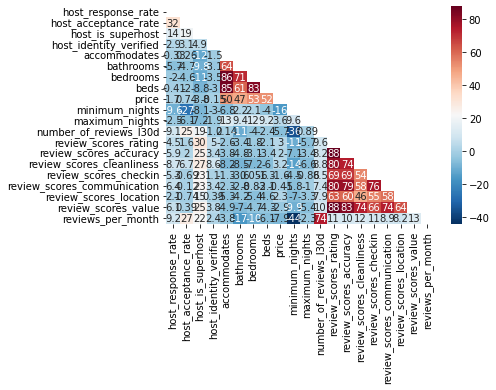

In [50]:
# correlation heatmap
mask = np.zeros_like(airbnb.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# heatmap
sb.heatmap(airbnb.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

The median list price is $99.00.


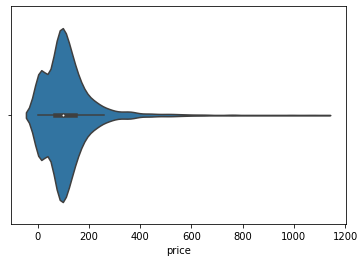

In [51]:
# view distribution of the target variable (price)
sb.violinplot(data=airbnb, x='price')
print(f"The median list price is ${(airbnb.price.median()):,.2f}.")

In [52]:
airbnb.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,2101.000000,2101.000000,2101.00000,2101.00000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000
mean,98.662066,92.347454,0.68634,0.84436,4.013803,1.257258,1.646835,2.112327,117.724417,7.279867,531.967634,1.907663,4.852432,4.886069,4.859710,4.921266,4.915988,4.881447,4.795940,2.738696
std,8.211434,16.164959,0.46409,0.36260,2.033599,0.539489,0.962623,1.304478,106.734043,11.577759,517.294375,2.232881,0.285615,0.276352,0.282657,0.274738,0.271439,0.234751,0.306419,2.267940
min,0.000000,0.000000,0.00000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,100.000000,93.000000,0.00000,1.00000,2.000000,1.000000,1.000000,1.000000,68.000000,1.000000,30.000000,0.000000,4.830000,4.880000,4.840000,4.940000,4.920000,4.860000,4.750000,0.920000
50%,100.000000,98.000000,1.00000,1.00000,4.000000,1.000000,1.000000,2.000000,99.000000,2.000000,360.000000,1.000000,4.920000,4.950000,4.930000,4.980000,4.980000,4.930000,4.860000,2.240000
75%,100.000000,100.000000,1.00000,1.00000,5.000000,1.000000,2.000000,2.000000,145.000000,4.000000,1125.000000,3.000000,4.980000,5.000000,4.990000,5.000000,5.000000,4.990000,4.930000,3.930000
max,100.000000,100.000000,1.00000,1.00000,16.000000,5.000000,9.000000,16.000000,1096.000000,120.000000,1125.000000,14.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,14.690000


In [53]:
airbnb.dtypes

host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost                int64
host_identity_verified           int64
neighbourhood_cleansed          object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews_l30d           int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

In [54]:
# we know there is no missing/null or duplicate data because it was completed in the ETL file

In [55]:
# assign dummy values to object columns
# by hot encode categorical data
airbnb_dum = pd.get_dummies(airbnb, columns = ['host_response_time', 'neighbourhood_cleansed', 'room_type'])
airbnb_dum.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,neighbourhood_cleansed_Sunderland,neighbourhood_cleansed_Sunnyside,neighbourhood_cleansed_Sylvan-Highlands,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Vernon,neighbourhood_cleansed_West Portland Park,neighbourhood_cleansed_Wilkes,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodstock,room_type_Entire home/apt
0,100.0,100.0,1,0,3,1.0,2.0,2.0,89.0,3,...,0,0,0,0,0,0,0,0,0,1
1,100.0,55.0,1,1,3,1.0,1.0,1.0,14.0,30,...,0,0,0,0,0,0,0,0,0,1
2,100.0,100.0,1,1,2,1.0,1.0,1.0,129.0,3,...,0,0,0,0,0,0,0,0,0,1
3,100.0,73.0,1,1,2,1.0,1.0,1.0,104.0,30,...,0,0,0,0,0,0,0,0,0,1
4,100.0,0.0,0,1,12,2.0,4.0,5.0,425.0,4,...,0,0,0,0,0,0,0,0,0,1


In [56]:
airbnb_dum.dtypes

host_response_rate                           float64
host_acceptance_rate                         float64
host_is_superhost                              int64
host_identity_verified                         int64
accommodates                                   int64
                                              ...   
neighbourhood_cleansed_West Portland Park      uint8
neighbourhood_cleansed_Wilkes                  uint8
neighbourhood_cleansed_Woodlawn                uint8
neighbourhood_cleansed_Woodstock               uint8
room_type_Entire home/apt                      uint8
Length: 117, dtype: object

## Scale & Normalize the Data

#### Resources
* https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832
* https://medium.com/p/b79592732b79
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

## Machine Learning

#### StandardScaler

In [57]:
# set features list for assigning df after scaler
airbnb_scaled_std = airbnb_dum.copy()
airbnb_scaled_std = airbnb_scaled_std.drop('price', axis=1)
col_names_std_airbnb = airbnb_scaled_std.columns
features_std_airbnb = airbnb_scaled_std[col_names_std_airbnb]

In [58]:
from sklearn.preprocessing import StandardScaler
scaler_std_airbnb = StandardScaler()

In [59]:
# set variables
y_std_airbnb = airbnb_dum.price
X_std_airbnb = airbnb_scaled_std

In [60]:
# fit and transform the X data; leave y data so we can interpret predicted price
airbnb_scaled_std[col_names_std_airbnb] = scaler_std_airbnb.fit_transform(features_std_airbnb.values)
airbnb_scaled_std

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,neighbourhood_cleansed_Sunderland,neighbourhood_cleansed_Sunnyside,neighbourhood_cleansed_Sylvan-Highlands,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Vernon,neighbourhood_cleansed_West Portland Park,neighbourhood_cleansed_Wilkes,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodstock,room_type_Entire home/apt
0,0.162974,0.473516,0.676021,-2.329179,-0.498645,-0.476969,0.366965,-0.086130,-0.369751,0.382914,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
1,0.162974,-2.310946,0.676021,0.429336,-0.498645,-0.476969,-0.672110,-0.852902,1.962862,0.382914,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
2,0.162974,0.473516,0.676021,0.429336,-0.990501,-0.476969,-0.672110,-0.852902,-0.369751,-0.972536,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
3,0.162974,-1.197161,0.676021,0.429336,-0.990501,-0.476969,-0.672110,-0.852902,1.962862,-0.448532,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
4,0.162974,-5.714177,-1.479244,0.429336,3.928060,1.377078,2.445116,2.214189,-0.283358,-0.322848,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,0.162974,0.473516,-1.479244,0.429336,-0.498645,-0.476969,-0.672110,-0.086130,-0.542537,-0.322848,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
2097,0.162974,-0.392761,-1.479244,0.429336,-0.006789,-0.476969,-0.672110,-0.852902,-0.542537,-0.322848,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
2098,0.162974,0.473516,-1.479244,0.429336,-0.990501,-0.476969,-0.672110,-0.852902,-0.369751,-0.972536,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0
2099,0.162974,0.473516,-1.479244,0.429336,1.468779,2.304101,1.406041,0.680643,-0.456144,1.146685,...,-0.021822,-0.187017,-0.043675,-0.090318,-0.159305,-0.072548,-0.043675,-0.114098,-0.120357,0.0


In [61]:
# check mean (~0) and standard deviation (~1) of the scaled data
airbnb_scaled_std.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,neighbourhood_cleansed_Sunderland,neighbourhood_cleansed_Sunnyside,neighbourhood_cleansed_Sylvan-Highlands,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Vernon,neighbourhood_cleansed_West Portland Park,neighbourhood_cleansed_Wilkes,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodstock,room_type_Entire home/apt
count,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,...,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2.101000e+03,2101.0
mean,-4.075221e-16,-7.440238e-17,-6.763853e-17,-1.217494e-16,1.690963e-17,3.381926e-17,2.705541e-17,1.103353e-16,2.705541e-17,5.918371e-17,...,3.381926e-18,-6.172016e-17,6.763853e-18,6.763853e-18,1.352771e-17,-8.877557e-18,1.014578e-17,-1.860060e-17,-4.227408e-18,0.0
std,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,...,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,0.0
min,-1.201807e+01,-5.714177e+00,-1.479244e+00,-2.329179e+00,-1.482358e+00,-4.769692e-01,-6.721101e-01,-8.529024e-01,-5.425369e-01,-1.022809e+00,...,-2.182179e-02,-1.870170e-01,-4.367479e-02,-9.031827e-02,-1.593055e-01,-7.254763e-02,-4.367479e-02,-1.140979e-01,-1.203568e-01,0.0
25%,1.629743e-01,4.037757e-02,-1.479244e+00,4.293358e-01,-9.905014e-01,-4.769692e-01,-6.721101e-01,-8.529024e-01,-5.425369e-01,-9.706024e-01,...,-2.182179e-02,-1.870170e-01,-4.367479e-02,-9.031827e-02,-1.593055e-01,-7.254763e-02,-4.367479e-02,-1.140979e-01,-1.203568e-01,0.0
50%,1.629743e-01,3.497622e-01,6.760208e-01,4.293358e-01,-6.789067e-03,-4.769692e-01,-6.721101e-01,-8.612964e-02,-4.561439e-01,-3.325158e-01,...,-2.182179e-02,-1.870170e-01,-4.367479e-02,-9.031827e-02,-1.593055e-01,-7.254763e-02,-4.367479e-02,-1.140979e-01,-1.203568e-01,0.0
75%,1.629743e-01,4.735161e-01,6.760208e-01,4.293358e-01,4.850671e-01,-4.769692e-01,3.669652e-01,-8.612964e-02,-2.833577e-01,1.146685e+00,...,-2.182179e-02,-1.870170e-01,-4.367479e-02,-9.031827e-02,-1.593055e-01,-7.254763e-02,-4.367479e-02,-1.140979e-01,-1.203568e-01,0.0
max,1.629743e-01,4.735161e-01,6.760208e-01,4.293358e-01,5.895485e+00,6.939218e+00,7.640492e+00,1.064869e+01,9.738238e+00,1.146685e+00,...,4.582576e+01,5.347107e+00,2.289651e+01,1.107196e+01,6.277248e+00,1.378405e+01,2.289651e+01,8.764406e+00,8.308630e+00,0.0


In [62]:
airbnb_scaled_std.shape

(2101, 116)

In [63]:
from sklearn.model_selection import train_test_split
# split into testing and training sets
X_std_train_airbnb, X_std_test_airbnb, y_std_train_airbnb, y_std_test_airbnb = train_test_split(X_std_airbnb, y_std_airbnb, test_size=0.2, random_state=573)
print(X_std_train_airbnb.shape)

(1680, 116)


In [64]:
from sklearn.linear_model import LinearRegression
model_std_airbnb = LinearRegression()

In [65]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model_std_airbnb.fit(X_std_airbnb, y_std_airbnb)
training_score_std_airbnb = model_std_airbnb.score(X_std_train_airbnb, y_std_train_airbnb)
testing_score_std_airbnb = model_std_airbnb.score(X_std_test_airbnb, y_std_test_airbnb)

print(f"Training Score: {training_score_std_airbnb}")
print(f"Testing Score: {testing_score_std_airbnb}")

Training Score: 0.4245185198862452
Testing Score: 0.41195735450481497


In [66]:
y_pred_std_airbnb = model_std_airbnb.predict(X_std_test_airbnb)

In [67]:
# compare actual vs predicted
regr_df_std_airbnb = pd.DataFrame({'Actual':y_std_test_airbnb, 'Predicted':y_pred_std_airbnb, 'ABS Difference': abs(y_std_test_airbnb-y_pred_std_airbnb)})

In [68]:
regr_df_std_airbnb.describe()

,Actual,Predicted,ABS Difference
count,421.000000,421.000000,421.000000
mean,120.529691,121.822918,61.330278
std,125.310100,76.765288,73.915168
min,1.000000,-65.534495,0.011057
25%,63.000000,74.613943,17.011057
50%,97.000000,103.488943,39.988943
75%,147.000000,151.926443,81.909495
max,988.000000,536.082693,771.073557


#### MinMaxScaler

In [69]:
# set features list for assigning df after scaler
airbnb_scaled_mm = airbnb_dum.copy()
airbnb_scaled_mm = airbnb_scaled_mm.drop('price', axis=1)
col_names_mm_airbnb = airbnb_scaled_mm.columns
features_mm_airbnb = airbnb_scaled_mm[col_names_mm_airbnb]

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler_mm_airbnb = MinMaxScaler()

In [71]:
# set variables
y_mm_airbnb = airbnb_dum.price
X_mm_airbnb = airbnb_scaled_mm

In [72]:
# fit and transform the data
airbnb_scaled_mm[col_names_mm_airbnb] = scaler_mm_airbnb.fit_transform(features_mm_airbnb.values)
airbnb_scaled_mm

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,neighbourhood_cleansed_Sunderland,neighbourhood_cleansed_Sunnyside,neighbourhood_cleansed_Sylvan-Highlands,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Vernon,neighbourhood_cleansed_West Portland Park,neighbourhood_cleansed_Wilkes,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodstock,room_type_Entire home/apt
0,1.0,1.00,1.0,0.0,0.133333,0.000,0.125,0.066667,0.016807,0.647950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.55,1.0,1.0,0.133333,0.000,0.000,0.000000,0.243697,0.647950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.00,1.0,1.0,0.066667,0.000,0.000,0.000000,0.016807,0.023173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.73,1.0,1.0,0.066667,0.000,0.000,0.000000,0.243697,0.264706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.00,0.0,1.0,0.733333,0.250,0.375,0.266667,0.025210,0.322638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,1.0,1.00,0.0,1.0,0.133333,0.000,0.000,0.066667,0.000000,0.322638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2097,1.0,0.86,0.0,1.0,0.200000,0.000,0.000,0.000000,0.000000,0.322638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2098,1.0,1.00,0.0,1.0,0.066667,0.000,0.000,0.000000,0.016807,0.023173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2099,1.0,1.00,0.0,1.0,0.400000,0.375,0.250,0.133333,0.008403,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
airbnb_scaled_mm.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,neighbourhood_cleansed_Sunderland,neighbourhood_cleansed_Sunnyside,neighbourhood_cleansed_Sylvan-Highlands,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Vernon,neighbourhood_cleansed_West Portland Park,neighbourhood_cleansed_Wilkes,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodstock,room_type_Entire home/apt
count,2101.000000,2101.000000,2101.00000,2101.00000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,...,2101.000000,2101.000000,2101.000000,2101.000000,2101.00000,2101.000000,2101.000000,2101.000000,2101.000000,2101.0
mean,0.986621,0.923475,0.68634,0.84436,0.200920,0.064315,0.080854,0.074155,0.052772,0.471451,...,0.000476,0.033793,0.001904,0.008091,0.02475,0.005236,0.001904,0.012851,0.014279,0.0
std,0.082114,0.161650,0.46409,0.36260,0.135573,0.134872,0.120328,0.086965,0.097292,0.461047,...,0.021817,0.180740,0.043602,0.089609,0.15540,0.072185,0.043602,0.112658,0.118666,0.0
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,0.930000,0.00000,1.00000,0.066667,0.000000,0.000000,0.000000,0.000000,0.024064,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.980000,1.00000,1.00000,0.200000,0.000000,0.000000,0.066667,0.008403,0.318182,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,1.000000,1.00000,1.00000,0.266667,0.000000,0.125000,0.066667,0.025210,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0


In [74]:
airbnb_scaled_mm.shape

(2101, 116)

In [75]:
from sklearn.model_selection import train_test_split
# split into testing and training sets
X_mm_train_airbnb, X_mm_test_airbnb, y_mm_train_airbnb, y_mm_test_airbnb = train_test_split(X_mm_airbnb, y_mm_airbnb, test_size=0.2, random_state=573)
print(X_mm_train_airbnb.shape)

(1680, 116)


In [76]:
from sklearn.linear_model import LinearRegression
model_mm_airbnb = LinearRegression()

In [77]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model_mm_airbnb.fit(X_mm_airbnb, y_mm_airbnb)
training_score_mm_airbnb = model_mm_airbnb.score(X_mm_train_airbnb, y_mm_train_airbnb)
testing_score_mm_airbnb = model_mm_airbnb.score(X_mm_test_airbnb, y_mm_test_airbnb)

print(f"Training Score: {training_score_mm_airbnb}")
print(f"Testing Score: {testing_score_mm_airbnb}")

Training Score: 0.42481041857385415
Testing Score: 0.4129805414675801


In [78]:
y_pred_mm_airbnb = model_mm_airbnb.predict(X_mm_test_airbnb)

In [79]:
# compare actual vs predicted
regr_df_mm_airbnb = pd.DataFrame({'Actual':y_mm_test_airbnb, 'Predicted':y_pred_mm_airbnb, 'ABS Difference': abs(y_mm_test_airbnb-y_pred_mm_airbnb)})
regr_df_mm_airbnb

,Actual,Predicted,ABS Difference
1886,85.0,67.375,17.625
1906,436.0,220.875,215.125
1370,63.0,56.750,6.250
568,14.0,117.125,103.125
1124,15.0,133.750,118.750
...,...,...,...
744,103.0,87.125,15.875
629,101.0,101.125,0.125
1782,1.0,72.500,71.500
402,176.0,175.375,0.625


In [80]:
regr_df_mm_airbnb.describe()

,Actual,Predicted,ABS Difference
count,421.000000,421.000000,421.000000
mean,120.529691,121.880938,61.225356
std,125.310100,76.941305,73.893672
min,1.000000,-64.625000,0.125000
25%,63.000000,73.375000,16.875000
50%,97.000000,104.250000,40.125000
75%,147.000000,152.625000,81.750000
max,988.000000,539.375000,775.625000


### Determine Error of the model
https://medium.com/@amanbamrah/how-to-evaluate-the-accuracy-of-regression-results-b38e5512afd3

https://machinelearningmastery.com/regression-metrics-for-machine-learning/

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

#### StandardScaler

In [81]:
from sklearn import metrics

MAE_std_airbnb = metrics.mean_absolute_error(y_std_test_airbnb, y_pred_std_airbnb)
MSE_std_airbnb = metrics.mean_squared_error(y_std_test_airbnb,y_pred_std_airbnb)
RMSE_std_airbnb = np.sqrt(MSE_std_airbnb)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE_std_airbnb}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE_std_airbnb}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE_std_airbnb}.')

The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

The mean absolute error for this model is 61.33027821966319.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

The mean squared error for this model is is 9211.87783399613.

The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.

The root mean squared error for this model is 95.97852798410763.


In [82]:
R2_std_airbnb = model_std_airbnb.score(X_std_airbnb,y_std_airbnb)
print(f'R2 score is {R2_std_airbnb}')

R2 score is 0.42115539781372113


In [83]:
# calculate adjusted R2 since we have a multivariate regression
aR2_std_airbnb = 1-(((1-R2_std_airbnb)*(len(y_std_airbnb)-1))/(len(y_std_airbnb)-X_std_airbnb.shape[1]-1))
print(f'Adjusted R2 score is {aR2_std_airbnb}')
print(f'There are {len(y_std_airbnb)} in the observation and {X_std_airbnb.shape[1]} predictor variables.')

Adjusted R2 score is 0.38731166099234593
There are 2101 in the observation and 116 predictor variables.


#### MinMaxScaler

In [84]:
from sklearn import metrics

MAE_mm_airbnb = metrics.mean_absolute_error(y_mm_test_airbnb, y_pred_mm_airbnb)
MSE_mm_airbnb = metrics.mean_squared_error(y_mm_test_airbnb,y_pred_mm_airbnb)
RMSE_mm_airbnb = np.sqrt(MSE_mm_airbnb)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE_mm_airbnb}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE_mm_airbnb}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE_mm_airbnb}.')

The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

The mean absolute error for this model is 61.225356294536816.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

The mean squared error for this model is is 9195.849279988124.

The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.

The root mean squared error for this model is 95.8949909014445.


In [85]:
R2_mm_airbnb = model_mm_airbnb.score(X_mm_airbnb,y_mm_airbnb)
print(f'R2 score is {R2_mm_airbnb}')

R2 score is 0.4216488433060902


In [86]:
# calculate adjusted R2 since we have a multivariate regression
aR2_mm_airbnb = 1-(((1-R2_mm_airbnb)*(len(y_mm_airbnb)-1))/(len(y_mm_airbnb)-X_mm_airbnb.shape[1]-1))
print(f'Adjusted R2 score is {aR2_mm_airbnb}')
print(f'There are {len(y_mm_airbnb)} in the observation and {X_mm_airbnb.shape[1]} predictor variables.')

Adjusted R2 score is 0.38783395712842206
There are 2101 in the observation and 116 predictor variables.


### Results

The results between the StandardScaler and the the MinMaxScaler are nearly identical. An RMSE of about (USD)95 is not necessarily a poor fit RMSE, however, the low adjusted r-squared is indicative that the predicted model is not necessarily a good fit for the dataset. It would be recommended to further fine-tune this model.